In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-torch') # or just install the module
sys.path.append('../../fuzzy-tools') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [2]:
from fuzzytools.files import search_for_filedirs
from lchandler import C_ as C_

surveys_rootdir = '../../surveys-save/'
filedirs = search_for_filedirs(surveys_rootdir, fext=C_.EXT_SPLIT_LIGHTCURVE)

In [9]:
%load_ext autoreload
%autoreload 2
import numpy as np
from fuzzytools.files import load_pickle, save_pickle
from fuzzytools.files import get_dict_from_filedir

method = 'spm-mcmc-estw'
filedir = f'../../surveys-save/survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}.splcds'

filedict = get_dict_from_filedir(filedir)
root_folder = filedict['_rootdir']
cfilename = filedict['_cfilename']
survey = filedict['survey']
lcdataset = load_pickle(filedir)

from copy import copy
for k in lcdataset.lcsets.keys():
    for lcobj_name in lcdataset[k].get_lcobj_names():
        for b in lcdataset[k].band_names:
            lcdataset[k][lcobj_name].get_b(b).astype(np.float32) # fixme
            
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
LCDataset:
[outliers - samples 10]
(.) obs_samples=541 - min_len=14 - max_dur=408.0[days] - dur(p50)=133.8[days] - cadence(p50)=1.0[days]
(g) obs_samples=260 - min_len=6 - max_dur=408.0[days] - dur(p50)=133.8[days] - cadence(p50)=3.0[days]
(r) obs_samples=281 - min_len=8 - max_dur=376.0[days] - dur(p50)=128.7[days] - cadence(p50)=3.0[days]
   |█▌      | SLSN - 2/10 (20.00%)
   |████    | SNII-b-n - 5/10 (50.00%)
   |▊       | SNIa - 1/10 (10.00%)
   |█▌      | SNIbc - 2/10 (20.00%)
────────────────────────────────────────────────────────────────────────────────────────────────────
[faint - samples 48]
(.) obs_samples=1,107 - min_len=7 - max_dur=298.1[days] - dur(p50)=40.5[days] - cadence(p50)=1.0[days]
(g) obs_samples=450 - min_len=0 - max_dur=221.7[days] - dur(p50)=28.0[days] - cadence(p50)=2.9[days]
(r) obs_samples=657 - min_len=4 - max_dur=298.1[days] - dur(p50)=38.9[days] - cadence(p50)=2.9[days

In [10]:
%load_ext autoreload
%autoreload 2
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
LCDataset:
[outliers - samples 10]
(.) obs_samples=541 - min_len=14 - max_dur=408.0[days] - dur(p50)=133.8[days] - cadence(p50)=1.0[days]
(g) obs_samples=260 - min_len=6 - max_dur=408.0[days] - dur(p50)=133.8[days] - cadence(p50)=3.0[days]
(r) obs_samples=281 - min_len=8 - max_dur=376.0[days] - dur(p50)=128.7[days] - cadence(p50)=3.0[days]
   |█▌      | SLSN - 2/10 (20.00%)
   |████    | SNII-b-n - 5/10 (50.00%)
   |▊       | SNIa - 1/10 (10.00%)
   |█▌      | SNIbc - 2/10 (20.00%)
────────────────────────────────────────────────────────────────────────────────────────────────────
[faint - samples 48]
(.) obs_samples=1,107 - min_len=7 - max_dur=298.1[days] - dur(p50)=40.5[days] - cadence(p50)=1.0[days]
(g) obs_samples=450 - min_len=0 - max_dur=221.7[days] - dur(p50)=28.0[days] - cadence(p50)=2.9[days]
(r) obs_samples=657 - min_len=4 - max_dur=298.1[days] - dur(p50)=38.9[days] - cadence(p50)=2.9[days

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


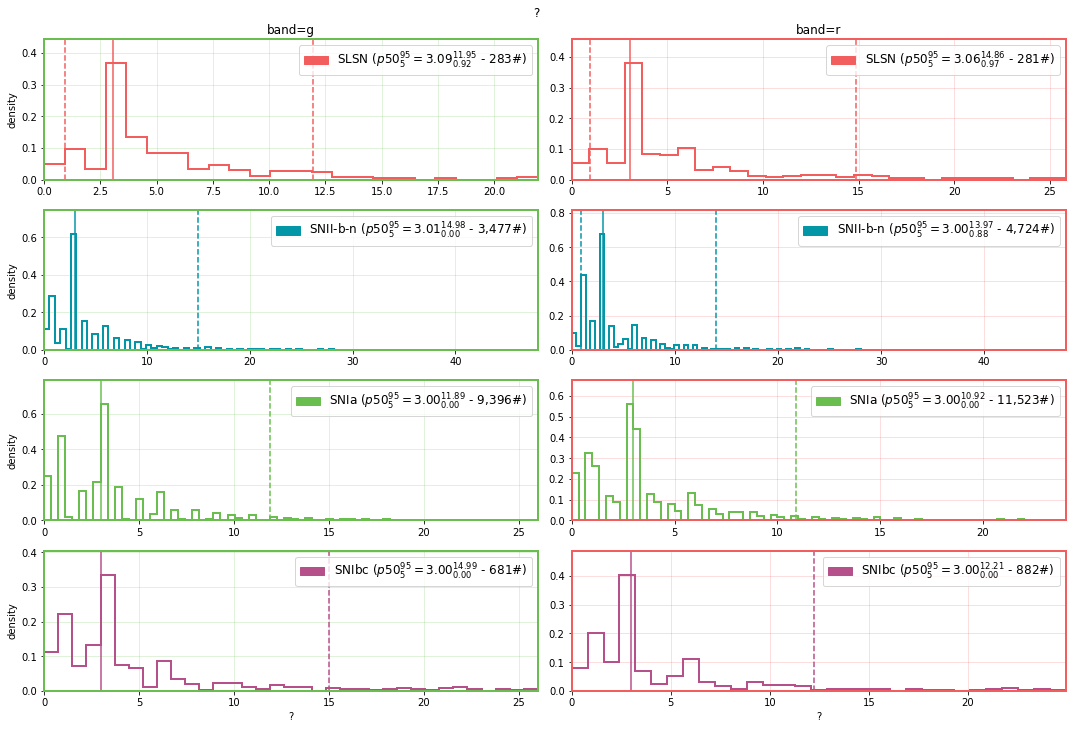

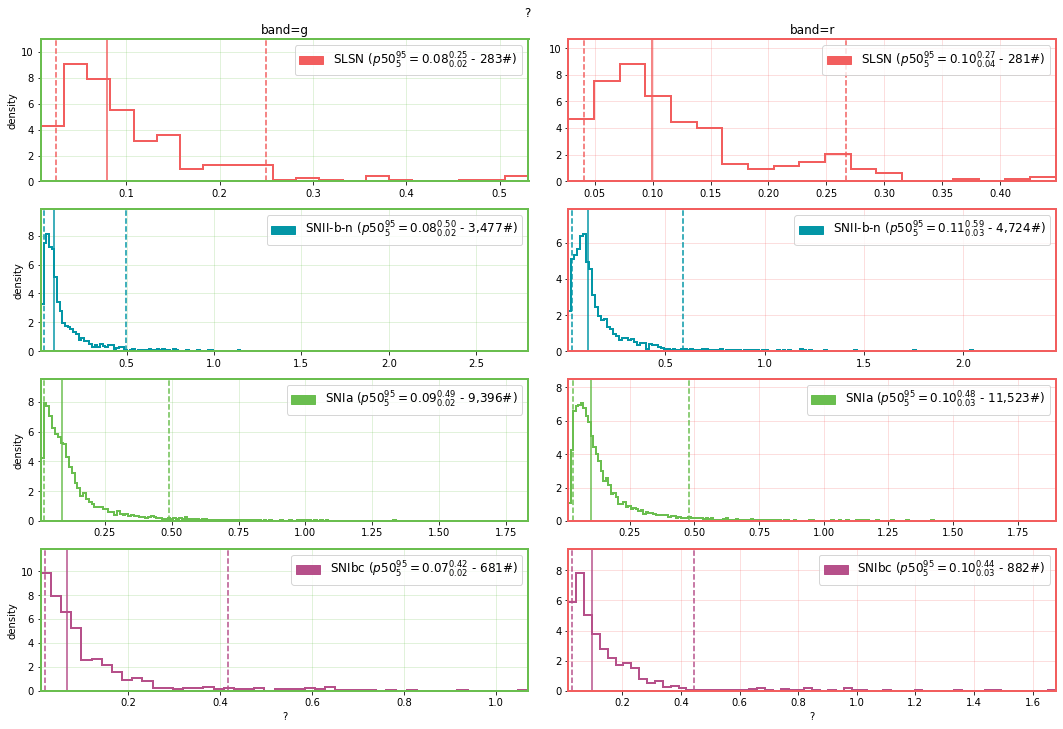

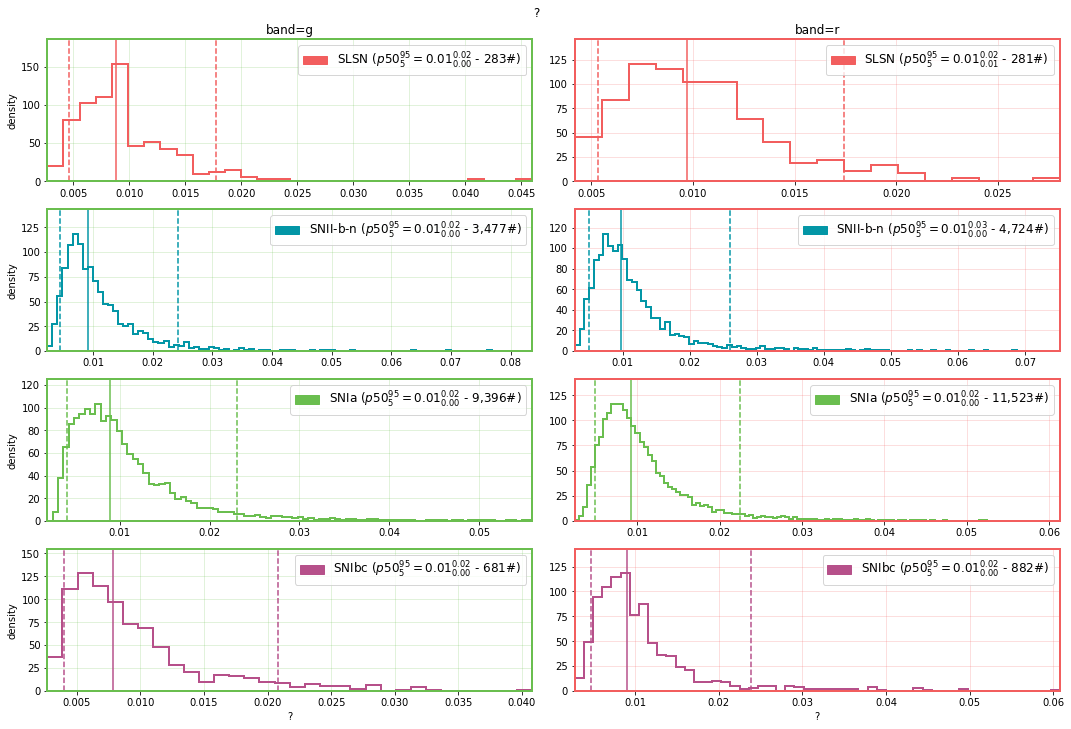

In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from lchandler.plots.distrs import plot_values_distribution

kf = 0
set_name = f'{kf}@train'
lcdataset[set_name].set_diff_parallel('days')
plot_values_distribution(lcdataset, set_name, 'd_days')
plot_values_distribution(lcdataset, set_name, 'obs')
plot_values_distribution(lcdataset, set_name, 'obse')

In [12]:
%load_ext autoreload
%autoreload 2
from lcclassifier.datasets import CustomDataset

dataset_kwargs = {
    'max_day':100.,
    #attrs':['days','obs', 'obse']
    'in_attrs':['obs', 'obse'],
    #'attrs':['d_days','obs', 'obse']
    'rec_attr':'obs',
}
device = 'cpu' # cpu
train_dataset = CustomDataset(f'{kf}@train.{method}', copy(lcdataset[f'{kf}@train.{method}']), device, **dataset_kwargs)
val_dataset = CustomDataset(f'{kf}@val', copy(lcdataset[f'{kf}@val']), device, **dataset_kwargs)
train_dataset.transfer_scalers_to(val_dataset) # transfer metadata to val/test
print('train_dataset:', train_dataset)
print('val_dataset:', val_dataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
computing 0@train.spm-mcmc-estw
computing 0@val
train_dataset: CustomDataset(lcset_len=13,968, class_names=['SLSN', 'SNII-b-n', 'SNIa', 'SNIbc'], band_names=['g', 'r'], max_day=100.00, max_len=94, in_attrs=['obs', 'obse'], rec_attr=obs, append_in_ddays=False, balanced_w_cdict={'SLSN': 0.0016025641025641025, 'SNII-b-n': 0.00010016025641025641, 'SNIa': 2.3513920240782542e-05, 'SNIbc': 0.0003654970760233918}, populations_cdict={'SLSN': 156, 'SNII-b-n': 2496, 'SNIa': 10632, 'SNIbc': 684})
val_dataset: CustomDataset(lcset_len=387, class_names=['SLSN', 'SNII-b-n', 'SNIa', 'SNIbc'], band_names=['g', 'r'], max_day=100.00, max_len=148, in_attrs=['obs', 'obse'], rec_attr=obs, append_in_ddays=False, balanced_w_cdict={'SLSN': 0.0625, 'SNII-b-n': 0.0036231884057971015, 'SNIa': 0.000847457627118644, 'SNIbc': 0.013157894736842105}, populations_cdict={'SLSN': 4, 'SNII-b-n': 69, 'SNIa': 295, 'SNIbc': 19})


In [15]:
%load_ext autoreload
%autoreload 2
from fuzzytorch.utils import print_tdict
import cProfile

p = cProfile.Profile(); p.enable()
tdict = train_dataset.get_item(train_dataset.get_lcobj_names()[0])
print_tdict(tdict)
p.disable(); p.dump_stats('prof.prof')
print(tdict['target']['balanced_w'])
pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
float32
float32
float32
float32
float32
float32
{input: {s_onehot: (94, 2)-bool-cpu, onehot.g: (94, 1)-bool-cpu, rtime.g: (94, 1)-float32-cpu, rdtime.g: (94, 1)-float32-cpu, dtime.g: (94, 1)-float32-cpu, x.g: (94, 2)-float32-cpu, onehot.r: (94, 1)-bool-cpu, rtime.r: (94, 1)-float32-cpu, rdtime.r: (94, 1)-float32-cpu, dtime.r: (94, 1)-float32-cpu, x.r: (94, 2)-float32-cpu, onehot.*: (94, 1)-bool-cpu, rtime.*: (94, 1)-float32-cpu, rdtime.*: (94, 1)-float32-cpu, dtime.*: (94, 1)-float32-cpu, x.*: (94, 2)-float32-cpu}, target: {recx.g: (94, 1)-float32-cpu, rerror.g: (94, 1)-float32-cpu, recx.r: (94, 1)-float32-cpu, rerror.r: (94, 1)-float32-cpu, recx.*: (94, 1)-float32-cpu, rerror.*: (94, 1)-float32-cpu, y: ()-int64-cpu, balanced_w: ()-float32-cpu}}
tensor(0.0001)


In [8]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from lchandler.plots.lc import plot_lightcurve
from lchandler import C_ as C_
%matplotlib inline

dataset = train_dataset
lcobj_name = dataset.get_random_stratified_lcobj_names()[0]


tdict, lcobj = dataset.get_item(lcobj_name, uses_len_clip=False, uses_daugm=False, return_lcobjs=True)
print(lcobj)


minput = tdict['input']
target = tdict['target']

figsize = (10,13)
fig, axs = plt.subplots(5+1, 1, figsize=figsize)

ax = axs[0]
for kb,b in enumerate(dataset.band_names):
    plot_lightcurve(ax, lcobj, b, label=f'{b} obs', max_day=dataset.max_day)
ax.set_ylabel('observation')

b = 'r'
len_lcobj = minput[f'onehot.{b}'].sum()
ax = axs[1]
time = minput[f'rtime.{b}'][...,0]
for ka,in_attr in enumerate(dataset.in_attrs):
    ax.plot(time[:len_lcobj], minput[f'x.{b}'][:len_lcobj,ka], '-o', label=f'{C_.SHORT_NAME_DICT[in_attr]} (norm)')
ax.set_ylabel(f'x.{b}')

ax = axs[2]
ax.plot(time[:len_lcobj], minput[f'onehot.{b}'][:len_lcobj], 'o')
ax.set_ylabel(f'onehot.{b}')

ax = axs[3]
ax.plot(time[:len_lcobj], minput[f'rtime.{b}'][:len_lcobj], '-o')
ax.set_ylabel(f'time.{b}')

ax = axs[4]
ax.plot(time[:len_lcobj], minput[f'dtime.{b}'][:len_lcobj], '-o')
ax.set_ylabel(f'dtime.{b}')

ax = axs[5]
ax.plot(time[:len_lcobj], target[f'rec_x.{b}'][:len_lcobj], '-o')
ax.set_ylabel(f'rec_x.{b}')

class_name = dataset.class_names[target['y']]
title = ''
title += f'training light curve sample & model inputs & onehot & temporal encoding \n'
title += f'survey: {dataset.lcset.survey} - set: {dataset.lcset_name}'
title += f' - class: {class_name} - max_day: {dataset.max_day:.2f} - max_len: {dataset.max_len}'
#title += f' - training: {dataset.training}'
for ax in axs:
    #ax.legend(prop={'size':14})
    ax.legend(loc='upper right')
    ax.grid(alpha=0.5)
axs[0].set_title(title)
axs[-1].set_xlabel('days')
plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TypeError: get_item() got an unexpected keyword argument 'uses_daugm'

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.dataloaders import CustomDataLoader
from fuzzytorch.utils import print_tdict

loader_kwargs = {
    'batch_size':2,
}
random_subcrops = 3
s_train_loader = CustomDataLoader(train_dataset, shuffle=False, **loader_kwargs)
s_train_loader.eval()
dataset.set_max_day(40)

for k,tdict in enumerate(s_train_loader):
    target = tdict['target']
    print_tdict(tdict)
    print(tdict['input']['rtime.*'][0,:,0])
    break

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.dataloaders import CustomDataLoader
from fuzzytorch.utils import print_tdict

loader_kwargs = {
    'batch_size':1,
    #'num_workers':1, # bug?
}
random_subcrops = 3
s_train_loader = CustomDataLoader(train_dataset, shuffle=True, random_subcrops=random_subcrops, **loader_kwargs)
s_train_loader.train()

for k,tdict in enumerate(s_train_loader):
    model_input = tdict['input']
    target = tdict['target']
    print_tdict(tdict)
    for idx in range(len(model_input['x'])):
        print(model_input['x'][idx,:,0])
        print(model_input['onehot'][idx].sum(-1))
    assert 0